# TASK 2 - EDA #

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets
train = pd.read_csv("C:\\Users\\reshm\\OneDrive\\Desktop\\train.csv")
test = pd.read_csv("C:\\Users\\reshm\\OneDrive\\Desktop\\test.csv")
gender_submission = pd.read_csv("C:\\Users\\reshm\\OneDrive\\Desktop\\gender_submission.csv")

In [5]:
# Display the first few rows of each dataset
print(train.head())
print(test.head())
print(gender_submission.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
# Display summary statistics of the training dataset
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# Display information about the training dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Check for missing values in train and test datasets
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


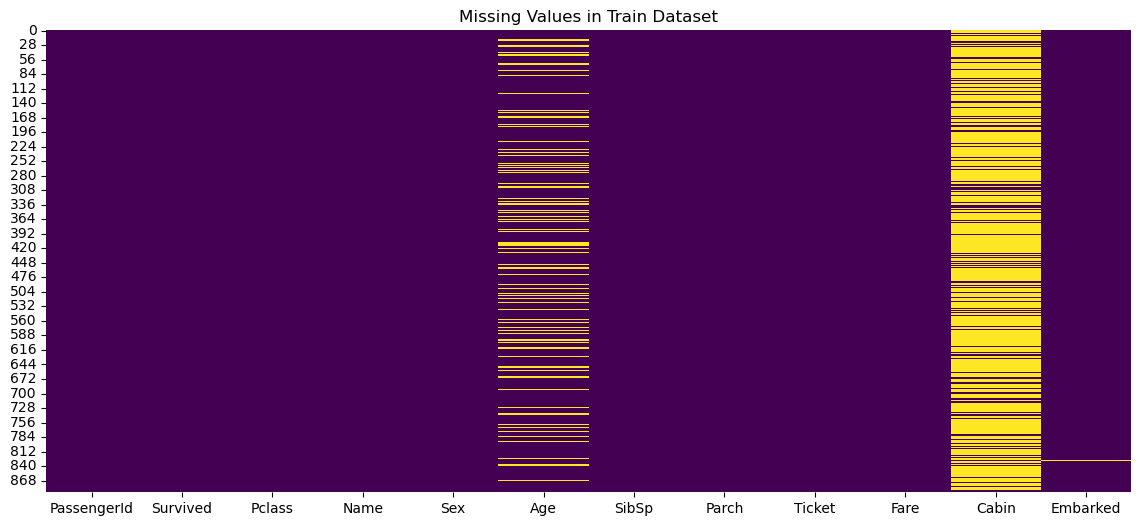

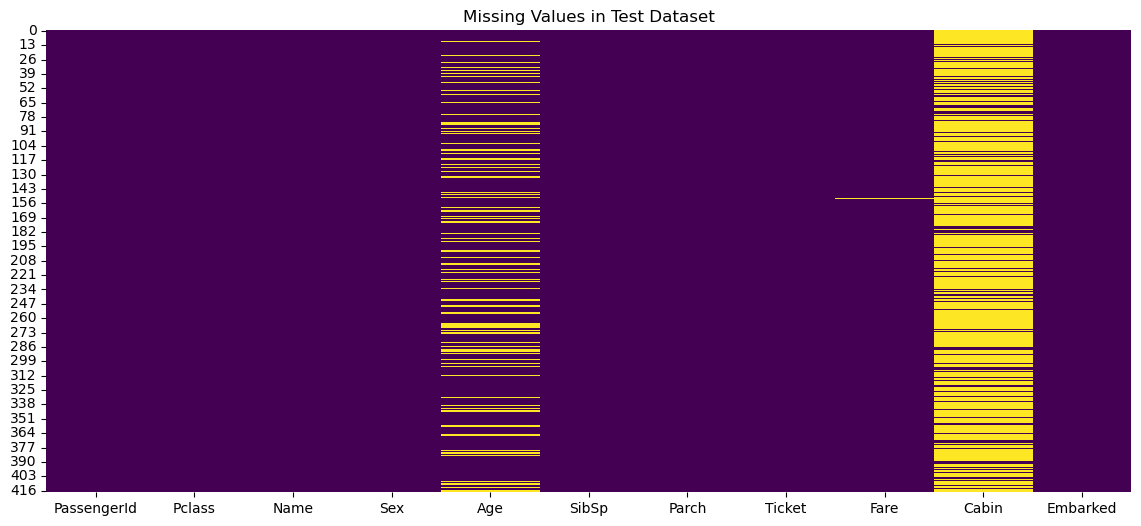

In [9]:
# Visualize missing values in the train and test datasets
plt.figure(figsize=(14, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Dataset')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Dataset')
plt.show()

In [10]:
# Combine train and test datasets for unified analysis
combined = pd.concat([train, test], sort=False)

### Univariate Analysis ###

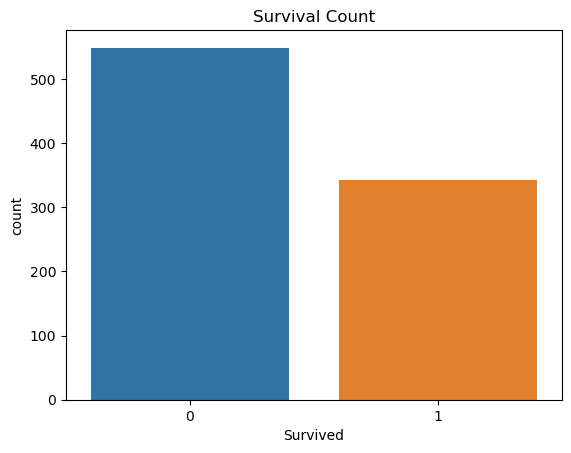

In [11]:
# Plot the distribution of the 'Survived' variable
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

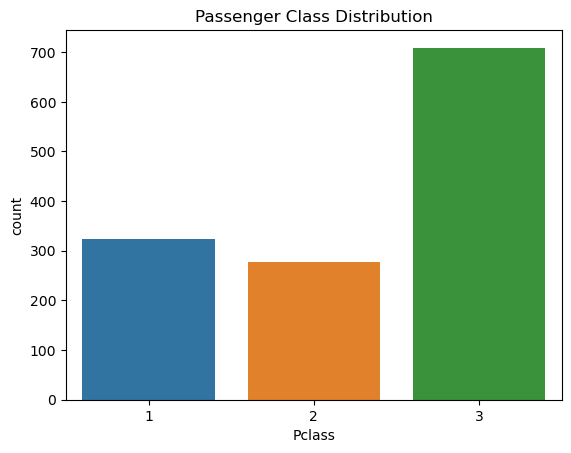

In [12]:
# Plot the distribution of the 'Pclass' variable
sns.countplot(x='Pclass', data=combined)
plt.title('Passenger Class Distribution')
plt.show()

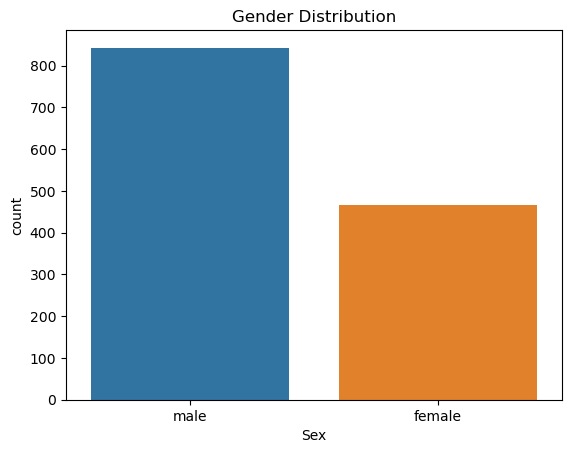

In [13]:
# Plot the distribution of the 'Sex' variable
sns.countplot(x='Sex', data=combined)
plt.title('Gender Distribution')
plt.show()

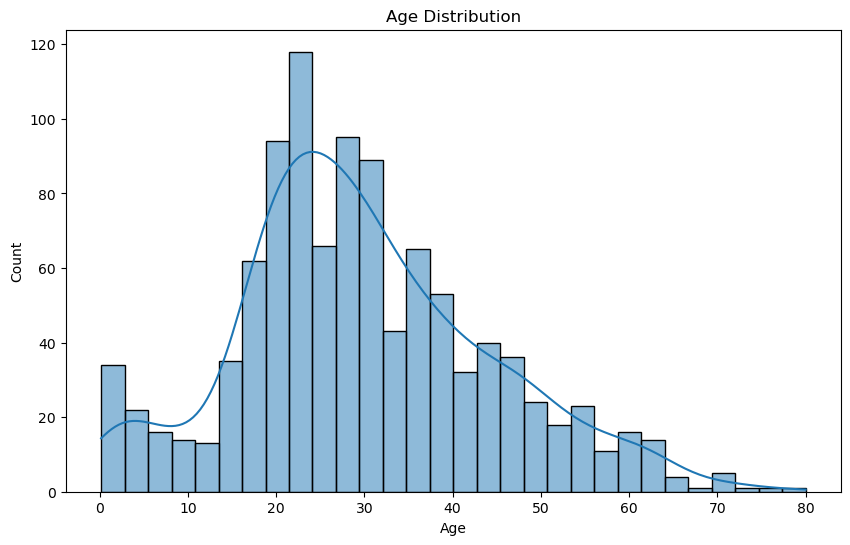

In [14]:
# Plot the distribution of the 'Age' variable
plt.figure(figsize=(10, 6))
sns.histplot(combined['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

### Bivariate Analysis ###


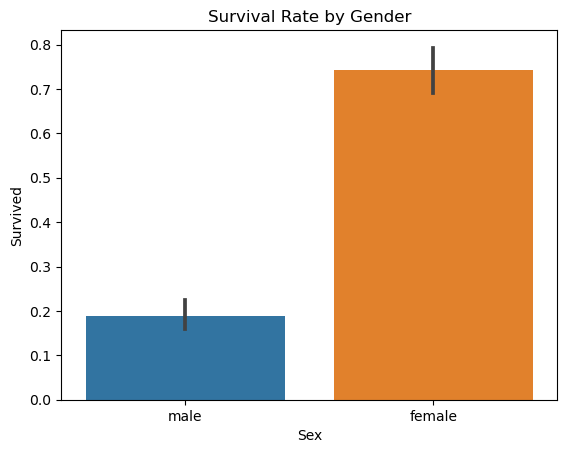

In [15]:
# Survival rate by 'Sex' in training dataset
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

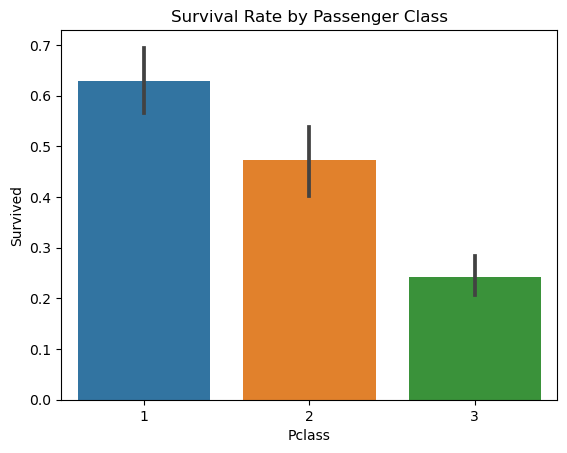

In [16]:
# Survival rate by 'Pclass' in training dataset
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

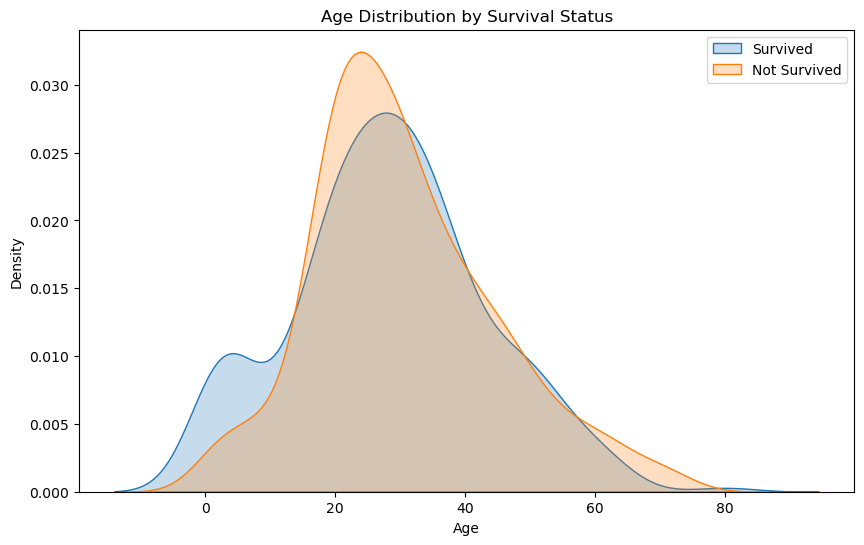

In [17]:
# Age distribution by 'Survived' in training dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train[train['Survived'] == 1]['Age'].dropna(), label='Survived', shade=True)
sns.kdeplot(data=train[train['Survived'] == 0]['Age'].dropna(), label='Not Survived', shade=True)
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()

### Categorical Analysis ###


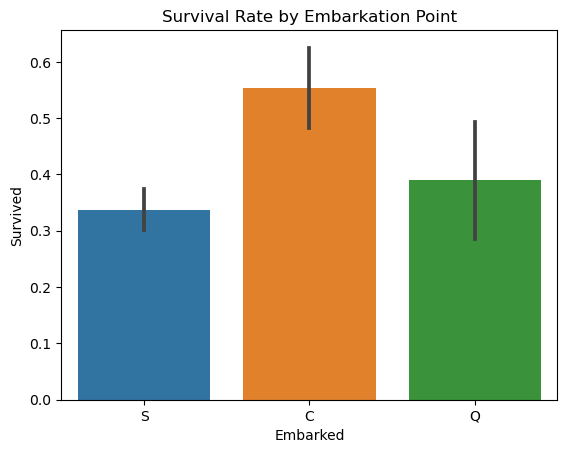

In [18]:
# Survival rate by 'Embarked' in training dataset
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarkation Point')
plt.show() 

### Multivariate Analysis ###



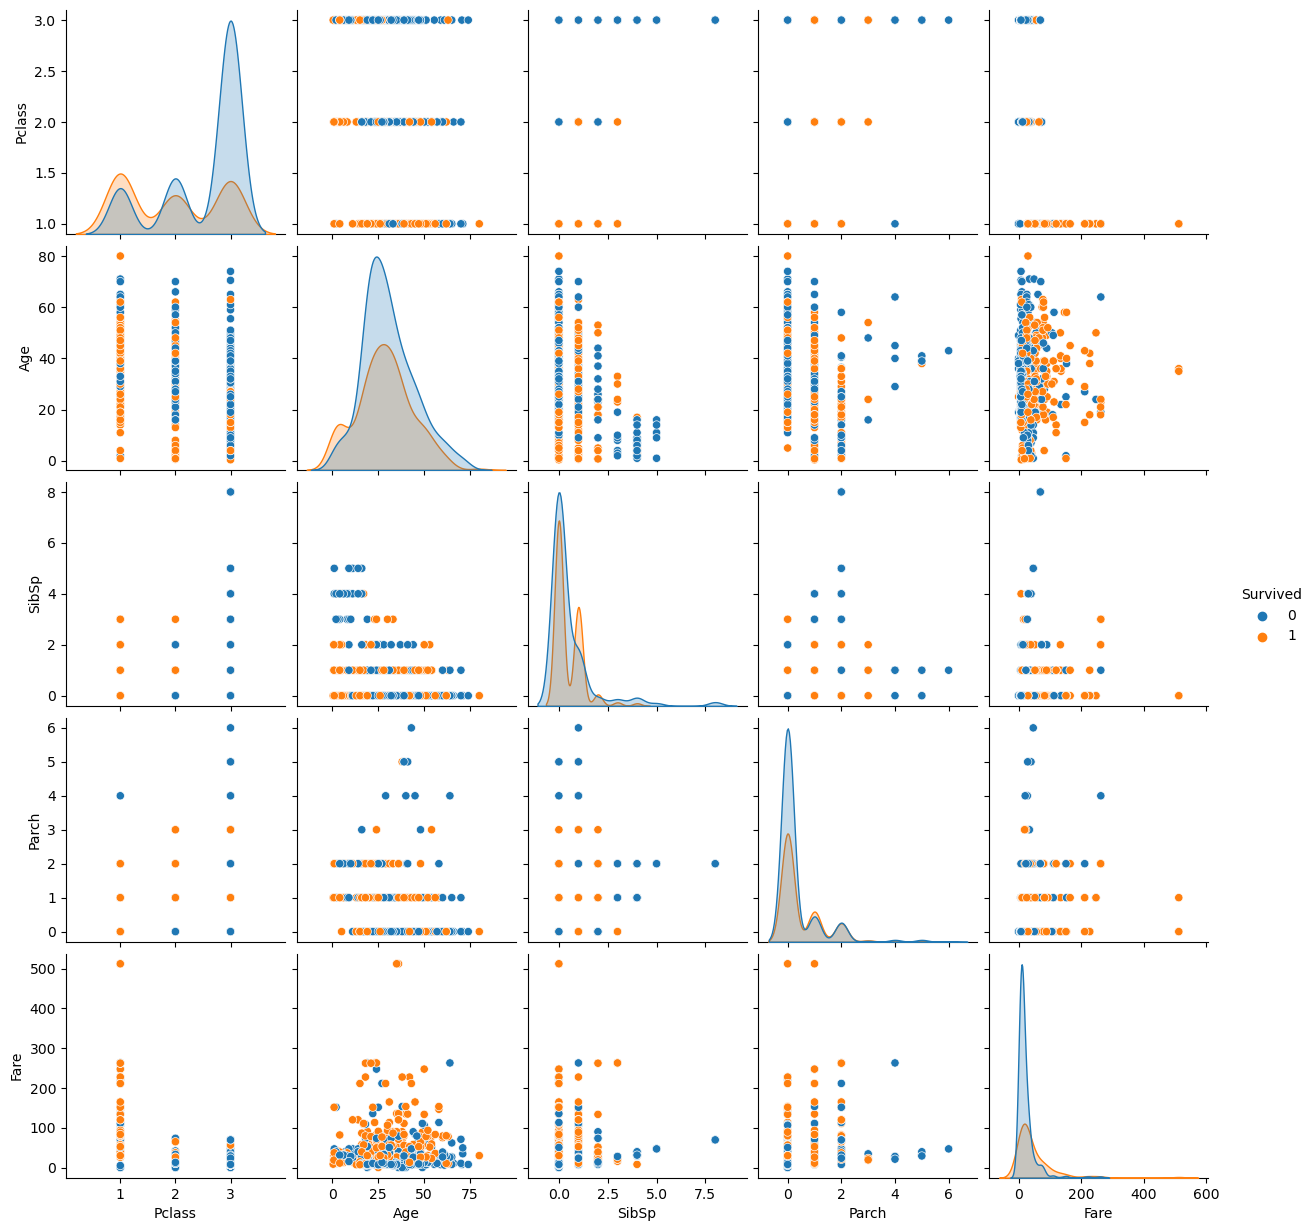

In [19]:
# Pairplot to visualize relationships between features in training dataset
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', diag_kind='kde')
plt.show()

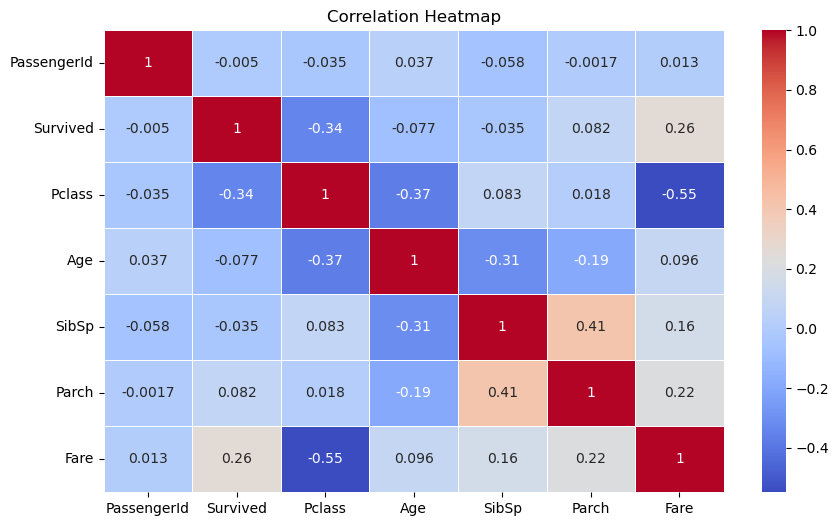

In [20]:
# Correlation heatmap of training dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Additional Analysis ###



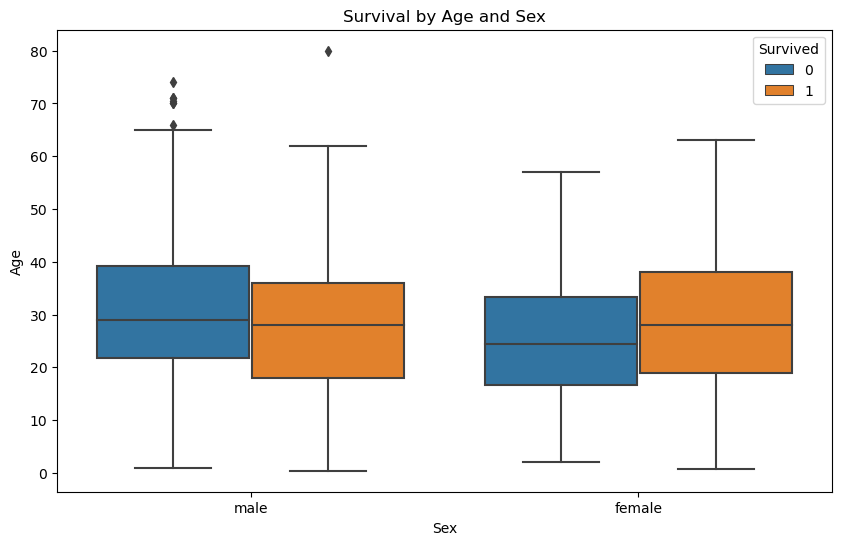

In [21]:
# Check survival rate by 'Age' and 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train)
plt.title('Survival by Age and Sex')
plt.show()

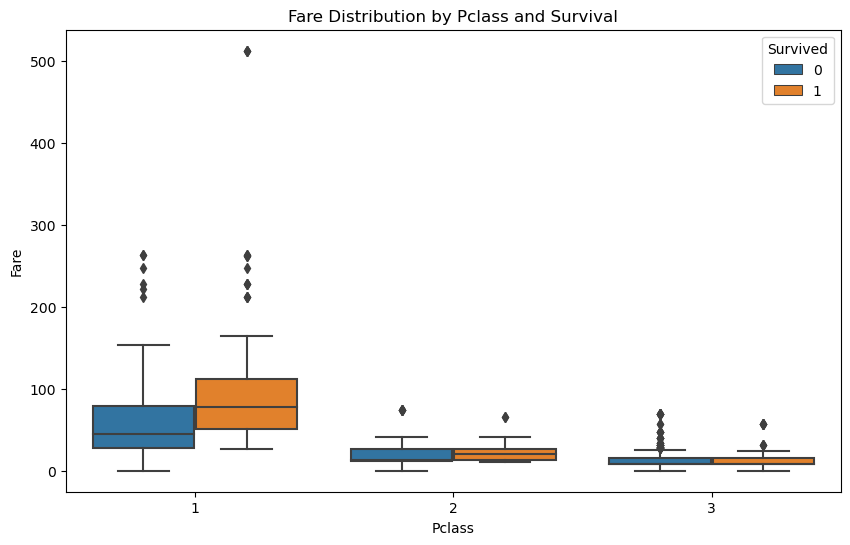

In [22]:
# Check fare distribution by 'Pclass' and 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train)
plt.title('Fare Distribution by Pclass and Survival')
plt.show()